# Reto Caso Aerolíneas

## Importación y análisis Inicial de Datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
caso_aero = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/DescargarCasoAerolineasDatos.csv")
datos_originales = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DataSets/DescargarDatosOriginales.xlsx")

In [ ]:
datos_originales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Airline                       108 non-null    object        
 1   AA                            108 non-null    int64         
 2   Delta                         108 non-null    int64         
 3   United                        108 non-null    int64         
 4   Airport Code-1                108 non-null    object        
 5   Airport Code                  108 non-null    object        
 6   Airport Name                  108 non-null    object        
 7   Days from Purchase to Travel  108 non-null    int64         
 8   Fare Type                     108 non-null    object        
 9   Business                      108 non-null    int64         
 10  First Class                   108 non-null    int64         
 11  Latitude                      10

## Análisis Descriptivo de los Datos

Frecuencia de Aerolínea

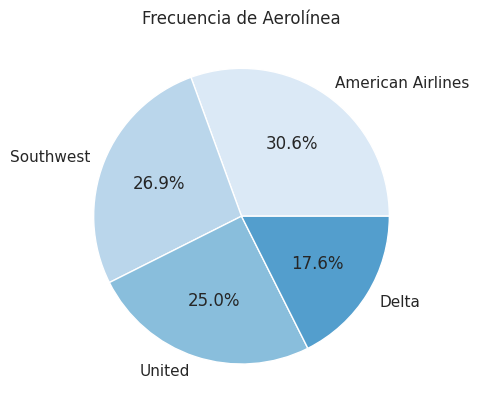

In [ ]:
sns.set(palette="Blues", style = "whitegrid")
counts = datos_originales["Airline"].value_counts()
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%")
plt.ylabel("");
plt.title("Frecuencia de Aerolínea");

In [ ]:
datos_originales["Airline"].value_counts()

American Airlines    33
Southwest            29
United               27
Delta                19
Name: Airline, dtype: int64

In [ ]:
aerolineas_fare = datos_originales[["Airline","Fare Type"]].groupby("Fare Type").value_counts()
aerolineas_fare = pd.DataFrame(aerolineas_fare)
aerolineas_fare

fare_business = datos_originales.loc[datos_originales["Fare Type"]=="Business"]
fare_economy = datos_originales.loc[datos_originales["Fare Type"]=="Economy"]
fare_first = datos_originales.loc[datos_originales["Fare Type"]=="First Class"]

In [ ]:
conteo_business = pd.DataFrame(fare_business["Airline"].value_counts())
conteo_business["Tipo de boleto"] = "Business"

conteo_economy = pd.DataFrame(fare_economy["Airline"].value_counts())
conteo_economy["Tipo de boleto"] = "Economy"

conteo_first = pd.DataFrame(fare_first["Airline"].value_counts())
conteo_first["Tipo de boleto"] = "First Class"

datos_barras_tipo = pd.concat([conteo_business, conteo_economy, conteo_first])

datos_barras_tipo

,Airline,Tipo de boleto
Delta,9,Business
American Airlines,8,Business
United,8,Business
American Airlines,13,Economy
United,10,Economy
Delta,6,Economy
Southwest,29,First Class
American Airlines,12,First Class
United,9,First Class
Delta,4,First Class


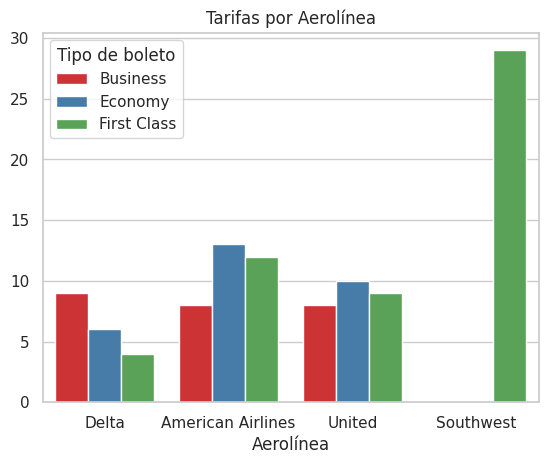

In [ ]:
sns.set_palette("Set1")
sns.barplot(datos_barras_tipo,x=datos_barras_tipo.index, y="Airline", hue="Tipo de boleto")
plt.xlabel("Aerolínea");
plt.ylabel("");
plt.title("Tarifas por Aerolínea");

In [ ]:
def resumen_variable(df, Fare):
  print("La tarifa es: "+ Fare)
  print("El promedio es: "+ str(df["Ticket Price"].mean()))
  print("La desviación estándar es: "+ str(df["Ticket Price"].std()))
  print("El máximo es: "+ str(df["Ticket Price"].max()))
  print("la mediana es: " + str(df["Ticket Price"].median()))
  print()


resumen_variable(fare_business, "business")
resumen_variable(fare_economy, "economy")
resumen_variable(fare_first, "first class")

La tarifa es: business
El promedio es: 353.28
La desviación estándar es: 48.31624985447443
El máximo es: 442
la mediana es: 336.0

La tarifa es: economy
El promedio es: 383.7586206896552
La desviación estándar es: 51.60886909687257
El máximo es: 445
la mediana es: 408.0

La tarifa es: first class
El promedio es: 383.0925925925926
La desviación estándar es: 110.90575099818943
El máximo es: 620
la mediana es: 309.0



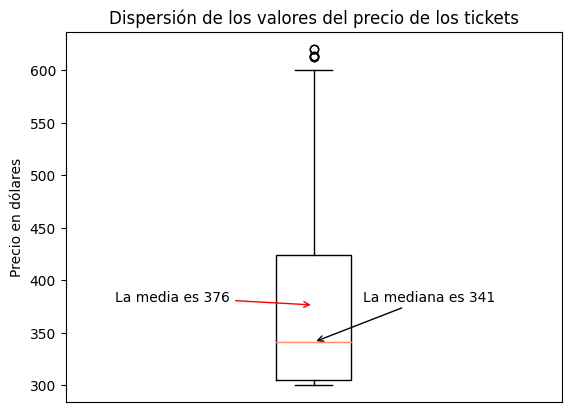

In [ ]:
sns.set_palette("Set2")
plt.boxplot(data = datos_originales, x="Ticket Price");
plt.title("Dispersión de los valores del precio de los tickets");
plt.xticks([]);
plt.ylabel("Precio en dólares");
plt.annotate("La mediana es " + str(round(datos_originales["Ticket Price"].median())), xy=(1,datos_originales["Ticket Price"].median()), xytext=(1.1, 380), arrowprops={
    "arrowstyle":"->"
});
plt.annotate("La media es " + str(round(datos_originales["Ticket Price"].mean())), xy=(1,datos_originales["Ticket Price"].mean()), xytext=(0.6, 380), arrowprops={
    "arrowstyle":"->", "color": "red"
});

In [ ]:
aerolineas_bar = datos_originales[["Airline","Ticket Price"]].groupby("Airline").mean()

Text(0, 0.5, 'Precio de los tickets en USD')

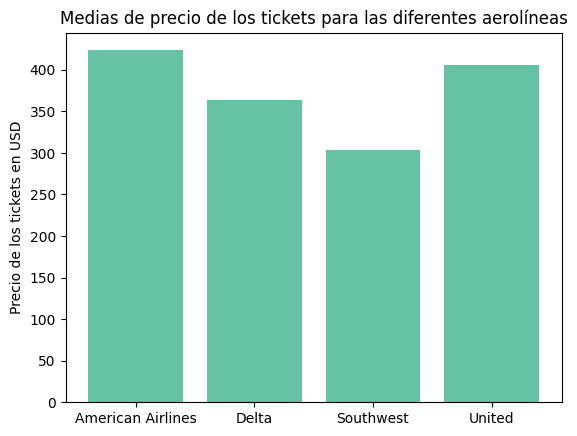

In [ ]:
sns.set_palette("Set2")
plt.bar(aerolineas_bar.index, aerolineas_bar["Ticket Price"])
plt.title("Medias de precio de los tickets para las diferentes aerolíneas")
plt.ylabel("Precio de los tickets en USD")

Text(0.5, 1.0, 'Relación entre el precio del boleto y días de antelación de compra')

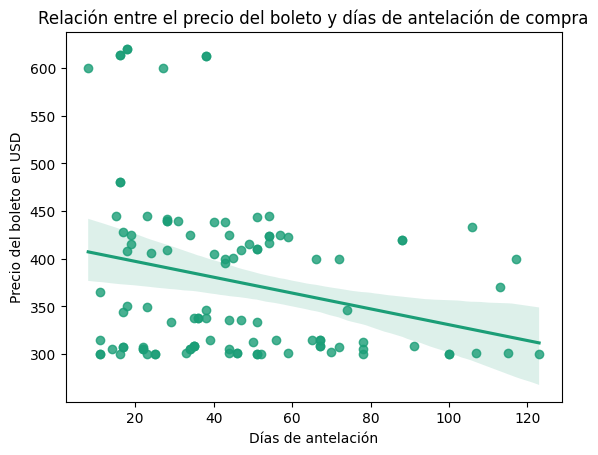

In [ ]:
sns.set_palette("Dark2")
sns.regplot(datos_originales, x="Days from Purchase to Travel", y="Ticket Price")
plt.xlabel("Días de antelación");
plt.ylabel("Precio del boleto en USD")
plt.title("Relación entre el precio del boleto y días de antelación de compra")

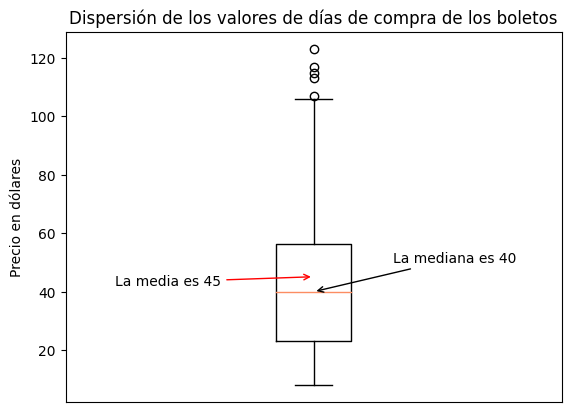

In [ ]:
sns.set_palette("Set2")
plt.boxplot(data = datos_originales, x="Days from Purchase to Travel");
plt.title("Dispersión de los valores de días de compra de los boletos");
plt.xticks([]);
plt.ylabel("Precio en dólares");
plt.annotate("La mediana es " + str(round(datos_originales["Days from Purchase to Travel"].median())), xy=(1,datos_originales["Days from Purchase to Travel"].median()), xytext=(1.16, 50), arrowprops={
    "arrowstyle":"->"
});
plt.annotate("La media es " + str(round(datos_originales["Days from Purchase to Travel"].mean())), xy=(1,datos_originales["Days from Purchase to Travel"].mean()), xytext=(0.6, 42), arrowprops={
    "arrowstyle":"->", "color": "red"
});

In [ ]:
dia_bar = datos_originales[["Dia.1","Ticket Price"]].groupby("Dia.1").mean()

Text(0, 0.5, 'Precio de los tickets en USD')

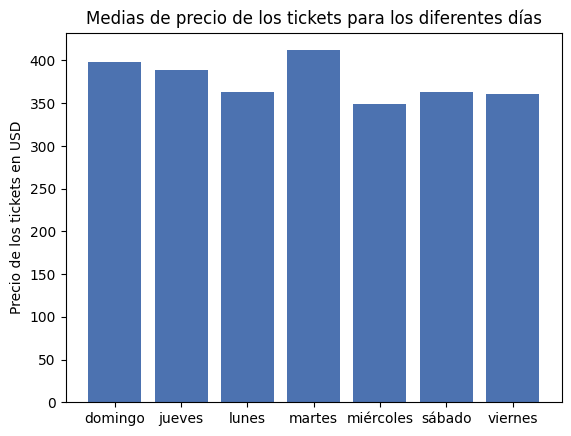

In [ ]:
sns.set_palette("deep")
plt.bar(dia_bar.index, dia_bar["Ticket Price"])
plt.title("Medias de precio de los tickets para los diferentes días")
plt.ylabel("Precio de los tickets en USD")

In [ ]:
fare_bar = datos_originales[["Fare Type","Ticket Price"]].groupby("Fare Type").mean()

Text(0, 0.5, 'Precio de los tickets en USD')

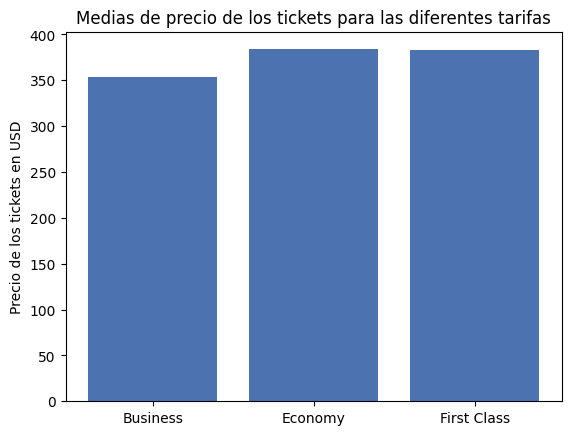

In [ ]:
plt.bar(fare_bar.index, fare_bar["Ticket Price"])
plt.title("Medias de precio de los tickets para las diferentes tarifas")
plt.ylabel("Precio de los tickets en USD")

In [ ]:
datos_originales.corr().to_excel("/content/drive/MyDrive/Colab Notebooks/DataSets/Correlación_aerolínea.xlsx",sheet_name="Hoja1")

<ipython-input-104-24a21237cd67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_originales.corr().to_excel("/content/drive/MyDrive/Colab Notebooks/DataSets/Correlación_aerolínea.xlsx",sheet_name="Hoja1")


Text(0.5, 1.0, 'Comparación de los precios de los boletos vs Aerolínea y Tarifa')

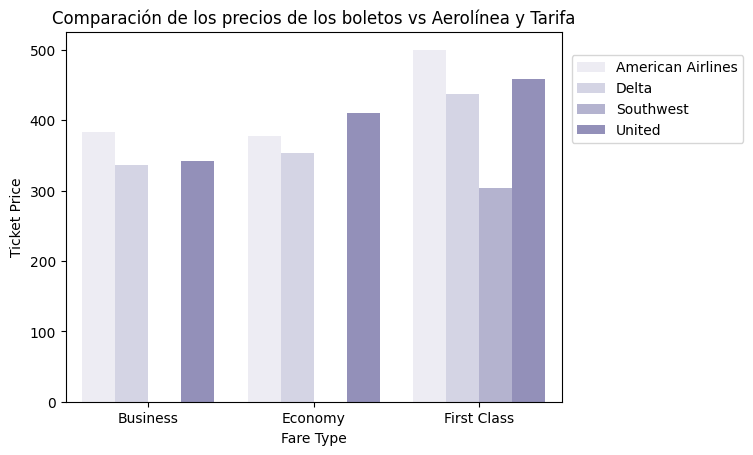

In [32]:
df = datos_originales[["Airline","Ticket Price","Fare Type"]].groupby(["Airline", "Fare Type"]).mean()

sns.set_palette("Purples")
sns.barplot(df, x="Fare Type", y="Ticket Price", hue="Airline")
plt.legend(loc=(1.02, 0.7));
plt.title("Comparación de los precios de los boletos vs Aerolínea y Tarifa")